In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 
#读取图片

img = cv2.imread('assets/home.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('img', img)
cv2.imshow('hist', hist)
cv2.waitKey(0)
cv2.destroyAllWindows()


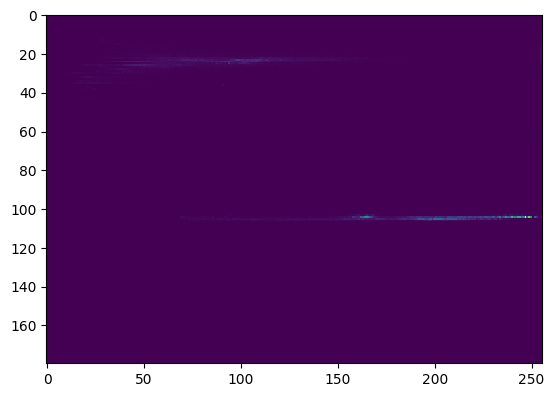

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('assets/home.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
hist, xbins, ybins = np.histogram2d(h.ravel(),s.ravel(),[180,256],[[0,180],[0,256]])

plt.imshow(hist, interpolation='nearest')
plt.show()

In [11]:
#!/usr/bin/env python

'''
Video histogram sample to show live histogram of video

Keys:
    ESC    - exit

'''

# Python 2/3 compatibility
from __future__ import print_function

import numpy as np
import cv2

# built-in modules
import sys

# # local modules
# import video


class App():

    def set_scale(self, val):
        self.hist_scale = val

    def run(self):
        hsv_map = np.zeros((180, 256, 3), np.uint8)
        h, s = np.indices(hsv_map.shape[:2])
        hsv_map[:, :, 0] = h
        hsv_map[:, :, 1] = s
        hsv_map[:, :, 2] = 255
        hsv_map = cv2.cvtColor(hsv_map, cv2.COLOR_HSV2BGR)
        cv2.imshow('hsv_map', hsv_map)

        cv2.namedWindow('hist', 0)
        self.hist_scale = 10

        cv2.createTrackbar('scale', 'hist', self.hist_scale, 32, self.set_scale)

        try:
            fn = sys.argv[1]
        except:
            fn = 0
        # cam = video.create_capture(
        #     fn, fallback='synth:bg=baboon.jpg:class=chess:noise=0.05')

        cam = cv2.VideoCapture(0)

        while True:
            _flag, frame = cam.read()
            cv2.imshow('camera', frame)

            small = cv2.pyrDown(frame)

            hsv = cv2.cvtColor(small, cv2.COLOR_BGR2HSV)
            dark = hsv[..., 2] < 32
            hsv[dark] = 0
            h = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

            h = np.clip(h*0.005*self.hist_scale, 0, 1)
            vis = hsv_map*h[:, :, np.newaxis] / 255.0
            cv2.imshow('hist', vis)

            ch = cv2.waitKey(1)
            if ch == 27:
                break

        print('Done')


if __name__ == '__main__':
    print(__doc__)
    App().run()
    cv2.destroyAllWindows()



Video histogram sample to show live histogram of video

Keys:
    ESC    - exit


Done


In [4]:
import numpy as np
import cv2
import sys

videoname = "assets/testvideo.mp4"

class App():
    def __init__(self, videoname=0):
        self.videoname = videoname
    
    def set_scale(self, val):
        self.hist_scale = val

    def run(self):
        hsv_map = np.zeros((180, 256, 3), np.uint8)
        h, s = np.indices(hsv_map.shape[:2])
        hsv_map[:, :, 0] = h
        hsv_map[:, :, 1] = s
        hsv_map[:, :, 2] = 255
        hsv_map = cv2.cvtColor(hsv_map, cv2.COLOR_HSV2BGR)
        cv2.imshow('hsv_map', hsv_map)

        cv2.namedWindow('hist', 0)
        self.hist_scale = 10

        cv2.createTrackbar('scale', 'hist', self.hist_scale,
                        32, self.set_scale)

        cam = cv2.VideoCapture(self.videoname)

        while True:
            _flag, frame = cam.read()
            
            if frame is None:
                break

            small = cv2.pyrDown(frame)
            cv2.imshow('video', frame)

            hsv = cv2.cvtColor(small, cv2.COLOR_BGR2HSV)
            dark = hsv[..., 2] < 32
            hsv[dark] = 0
            h = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

            h = np.clip(h*0.005*self.hist_scale, 0, 1)
            vis = hsv_map*h[:, :, np.newaxis] / 255.0
            cv2.imshow('hist', vis)

            ch = cv2.waitKey(15)
            if ch == 27:
                break

        print('Done')
        cv2.destroyAllWindows()


if __name__ == '__main__':
    
    app = App(videoname=videoname)
    app.run()


Done
